In [ ]:
import tensorflow as tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation,BatchNormalization
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import numpy as np
import keras
from keras.layers import Dense, Dropout, Input
from keras.models import Model,Sequential
from keras.datasets import mnist
from tqdm import tqdm
from keras.layers.advanced_activations import LeakyReLU
from tensorflow.keras.optimizers import Adam

In [ ]:
mnist = keras.datasets.mnist 
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [ ]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32') 

In [ ]:
def load_data():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train = (x_train.astype(np.float32) - 127.5)/127.5
    
    # convert shape of x_train from (60000, 28, 28) to (60000, 784) 
    # 784 columns per row
    x_train = x_train.reshape(60000, 784)
    return (x_train, y_train, x_test, y_test)
(X_train, y_train,X_test, y_test)=load_data()
print(X_train.shape)

(60000, 784)


In [ ]:
def build_generator():
    generator=Sequential()
    generator.add(Dense(units=256,input_dim=100))
    generator.add(LeakyReLU(0.2))
    
    generator.add(Dense(units=512))
    generator.add(LeakyReLU(0.2))
    
    generator.add(Dense(units=1024))
    generator.add(LeakyReLU(0.2))
    
    generator.add(Dense(units=784, activation='tanh'))
    
    generator.compile(loss='binary_crossentropy', optimizer= 'adam')
    return generator
g=build_generator()
g.summary()

Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_168 (Dense)            (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_126 (LeakyReLU)  (None, 256)               0         
_________________________________________________________________
dense_169 (Dense)            (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_127 (LeakyReLU)  (None, 512)               0         
_________________________________________________________________
dense_170 (Dense)            (None, 1024)              525312    
_________________________________________________________________
leaky_re_lu_128 (LeakyReLU)  (None, 1024)              0         
_________________________________________________________________
dense_171 (Dense)            (None, 784)             

In [ ]:
def build_discriminator():
    discriminator=Sequential()
    discriminator.add(Dense(units=1024,input_dim=784))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dropout(0.3))
       
    
    discriminator.add(Dense(units=512))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dropout(0.3))
       
    discriminator.add(Dense(units=256))
    discriminator.add(LeakyReLU(0.2))
    
    discriminator.add(Dense(units=1, activation='sigmoid'))
    
    discriminator.compile(loss='binary_crossentropy',optimizer= 'adam')
    return discriminator
d =build_discriminator()
d.summary()


Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_172 (Dense)            (None, 1024)              803840    
_________________________________________________________________
leaky_re_lu_129 (LeakyReLU)  (None, 1024)              0         
_________________________________________________________________
dropout_42 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_173 (Dense)            (None, 512)               524800    
_________________________________________________________________
leaky_re_lu_130 (LeakyReLU)  (None, 512)               0         
_________________________________________________________________
dropout_43 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_174 (Dense)            (None, 256)             

In [ ]:
def create_gan(discriminator, generator):
    discriminator.trainable=False
    gan_input = Input(shape=(100,))
    x = generator(gan_input)
    gan_output= discriminator(x)
    gan= Model(inputs=gan_input, outputs=gan_output)
    gan.compile(loss='binary_crossentropy', optimizer='adam')
    return gan
gan = create_gan(d,g)
gan.summary()

Model: "model_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_22 (InputLayer)        [(None, 100)]             0         
_________________________________________________________________
sequential_42 (Sequential)   (None, 784)               1486352   
_________________________________________________________________
sequential_43 (Sequential)   (None, 1)                 1460225   
Total params: 2,946,577
Trainable params: 1,486,352
Non-trainable params: 1,460,225
_________________________________________________________________


In [ ]:
# def plot_generated_images(epoch, generator, examples=100, dim=(10,10), figsize=(10,10)):
#     noise= np.random.normal(loc=0, scale=1, size=[examples, 100])
#     generated_images = generator.predict(noise)
#     generated_images = generated_images.reshape(100,28,28)
#     plt.figure(figsize=figsize)
#     for i in range(generated_images.shape[0]):
#         plt.subplot(dim[0], dim[1], i+1)
#         plt.imshow(generated_images[i], interpolation='nearest')
#         plt.axis('off')
#     plt.tight_layout()
#    plt.savefig('gan_generated_image %d.png' %epoch)

def plot_generated_images(epoch, generator, examples=1, dim=(10,10), figsize=(10,10)):
    noise= np.random.normal(loc=0, scale=1, size=[examples, 100])
    generated_images = generator.predict(noise)
    generated_images = generated_images.reshape(1,28,28)
    # plt.figure(figsize=figsize)
    for i in range(generated_images.shape[0]):
         #plt.subplot(dim[0], dim[1], i+1)
         plt.imshow(generated_images[i], interpolation='nearest')
    plt.axis('off')
    plt.tight_layout()
    plt.savefig('gan_generated_image %d.png' %epoch)


Epoch 1


  0%|          | 0/1 [00:00<?, ?it/s]

(1, 100)
GENERATE (1, 784)
REAL (1, 784)
(2, 784)
(2,)


100%|██████████| 1/1 [00:00<00:00,  1.16it/s]


Epoch 2


100%|██████████| 1/1 [00:00<00:00, 12.43it/s]


(1, 100)
GENERATE (1, 784)
REAL (1, 784)
(2, 784)
(2,)
Epoch 3


100%|██████████| 1/1 [00:00<00:00, 15.68it/s]


(1, 100)
GENERATE (1, 784)
REAL (1, 784)
(2, 784)
(2,)
Epoch 4


  0%|          | 0/1 [00:00<?, ?it/s]

(1, 100)


100%|██████████| 1/1 [00:00<00:00, 13.72it/s]


GENERATE (1, 784)
REAL (1, 784)
(2, 784)
(2,)
Epoch 5


  0%|          | 0/1 [00:00<?, ?it/s]

(1, 100)


100%|██████████| 1/1 [00:00<00:00, 13.18it/s]


GENERATE (1, 784)
REAL (1, 784)
(2, 784)
(2,)
Epoch 6


  0%|          | 0/1 [00:00<?, ?it/s]

(1, 100)


100%|██████████| 1/1 [00:00<00:00,  3.07it/s]


GENERATE (1, 784)
REAL (1, 784)
(2, 784)
(2,)
Epoch 7


100%|██████████| 1/1 [00:00<00:00, 14.32it/s]


(1, 100)
GENERATE (1, 784)
REAL (1, 784)
(2, 784)
(2,)
Epoch 8


100%|██████████| 1/1 [00:00<00:00, 13.45it/s]


(1, 100)
GENERATE (1, 784)
REAL (1, 784)
(2, 784)
(2,)
Epoch 9


  0%|          | 0/1 [00:00<?, ?it/s]

(1, 100)
GENERATE (1, 784)
REAL (1, 784)
(2, 784)
(2,)


100%|██████████| 1/1 [00:00<00:00, 15.64it/s]


Epoch 10


  0%|          | 0/1 [00:00<?, ?it/s]

(1, 100)
GENERATE (1, 784)
REAL (1, 784)
(2, 784)
(2,)


100%|██████████| 1/1 [00:00<00:00, 15.42it/s]


Epoch 11


  0%|          | 0/1 [00:00<?, ?it/s]

(1, 100)
GENERATE (1, 784)
REAL (1, 784)
(2, 784)
(2,)


100%|██████████| 1/1 [00:00<00:00, 14.13it/s]


Epoch 12


  0%|          | 0/1 [00:00<?, ?it/s]

(1, 100)
GENERATE (1, 784)
REAL (1, 784)
(2, 784)
(2,)


100%|██████████| 1/1 [00:00<00:00, 14.34it/s]


Epoch 13


  0%|          | 0/1 [00:00<?, ?it/s]

(1, 100)


100%|██████████| 1/1 [00:00<00:00, 14.32it/s]


GENERATE (1, 784)
REAL (1, 784)
(2, 784)
(2,)
Epoch 14


  0%|          | 0/1 [00:00<?, ?it/s]

(1, 100)
GENERATE (1, 784)
REAL (1, 784)
(2, 784)
(2,)


100%|██████████| 1/1 [00:00<00:00, 11.31it/s]


Epoch 15


  0%|          | 0/1 [00:00<?, ?it/s]

(1, 100)
GENERATE (1, 784)
REAL (1, 784)
(2, 784)
(2,)


100%|██████████| 1/1 [00:00<00:00, 13.24it/s]


Epoch 16


  0%|          | 0/1 [00:00<?, ?it/s]

(1, 100)
GENERATE (1, 784)
REAL (1, 784)
(2, 784)
(2,)


100%|██████████| 1/1 [00:00<00:00, 12.74it/s]


Epoch 17


  0%|          | 0/1 [00:00<?, ?it/s]

(1, 100)


100%|██████████| 1/1 [00:00<00:00, 13.55it/s]


GENERATE (1, 784)
REAL (1, 784)
(2, 784)
(2,)
Epoch 18


  0%|          | 0/1 [00:00<?, ?it/s]

(1, 100)


100%|██████████| 1/1 [00:00<00:00, 14.13it/s]


GENERATE (1, 784)
REAL (1, 784)
(2, 784)
(2,)
Epoch 19


  0%|          | 0/1 [00:00<?, ?it/s]

(1, 100)


100%|██████████| 1/1 [00:00<00:00, 14.27it/s]


GENERATE (1, 784)
REAL (1, 784)
(2, 784)
(2,)
Epoch 20


  0%|          | 0/1 [00:00<?, ?it/s]

(1, 100)


100%|██████████| 1/1 [00:00<00:00, 14.33it/s]

GENERATE (1, 784)
REAL (1, 784)
(2, 784)
(2,)


Epoch 21


  0%|          | 0/1 [00:00<?, ?it/s]

(1, 100)


100%|██████████| 1/1 [00:00<00:00, 11.01it/s]


GENERATE (1, 784)
REAL (1, 784)
(2, 784)
(2,)
Epoch 22


100%|██████████| 1/1 [00:00<00:00, 14.66it/s]


(1, 100)
GENERATE (1, 784)
REAL (1, 784)
(2, 784)
(2,)
Epoch 23


  0%|          | 0/1 [00:00<?, ?it/s]

(1, 100)
GENERATE (1, 784)
REAL (1, 784)
(2, 784)
(2,)


100%|██████████| 1/1 [00:00<00:00, 11.87it/s]


Epoch 24


  0%|          | 0/1 [00:00<?, ?it/s]

(1, 100)


100%|██████████| 1/1 [00:00<00:00, 14.75it/s]


GENERATE (1, 784)
REAL (1, 784)
(2, 784)
(2,)
Epoch 25


  0%|          | 0/1 [00:00<?, ?it/s]

(1, 100)
GENERATE (1, 784)
REAL (1, 784)
(2, 784)
(2,)


100%|██████████| 1/1 [00:00<00:00, 14.16it/s]


Epoch 26


  0%|          | 0/1 [00:00<?, ?it/s]

(1, 100)


100%|██████████| 1/1 [00:00<00:00, 13.20it/s]


GENERATE (1, 784)
REAL (1, 784)
(2, 784)
(2,)
Epoch 27


  0%|          | 0/1 [00:00<?, ?it/s]

(1, 100)


100%|██████████| 1/1 [00:00<00:00, 14.14it/s]


GENERATE (1, 784)
REAL (1, 784)
(2, 784)
(2,)
Epoch 28


  0%|          | 0/1 [00:00<?, ?it/s]

(1, 100)
GENERATE (1, 784)
REAL

100%|██████████| 1/1 [00:00<00:00, 14.50it/s]


 (1, 784)
(2, 784)
(2,)
Epoch 29


  0%|          | 0/1 [00:00<?, ?it/s]

(1, 100)
GENERATE (1, 784)
REAL (1, 784)
(2, 784)
(2,)


100%|██████████| 1/1 [00:00<00:00, 13.22it/s]


Epoch 30


  0%|          | 0/1 [00:00<?, ?it/s]

(1, 100)
GENERATE (1, 784)
REAL

100%|██████████| 1/1 [00:00<00:00, 14.25it/s]


 (1, 784)
(2, 784)
(2,)
Epoch 31


  0%|          | 0/1 [00:00<?, ?it/s]

(1, 100)
GENERATE (1, 784)
REAL (1, 784)
(2, 784)
(2,)


100%|██████████| 1/1 [00:00<00:00, 13.06it/s]


Epoch 32


  0%|          | 0/1 [00:00<?, ?it/s]

(1, 100)
GENERATE (1, 784)
REAL (1, 784)
(2, 784)
(2,)


100%|██████████| 1/1 [00:00<00:00, 13.71it/s]


Epoch 33


  0%|          | 0/1 [00:00<?, ?it/s]

(1, 100)


100%|██████████| 1/1 [00:00<00:00, 14.05it/s]


GENERATE (1, 784)
REAL (1, 784)
(2, 784)
(2,)
Epoch 34


  0%|          | 0/1 [00:00<?, ?it/s]

(1, 100)


100%|██████████| 1/1 [00:00<00:00, 13.00it/s]


GENERATE (1, 784)
REAL (1, 784)
(2, 784)
(2,)
Epoch 35


  0%|          | 0/1 [00:00<?, ?it/s]

(1, 100)


100%|██████████| 1/1 [00:00<00:00, 12.53it/s]


GENERATE (1, 784)
REAL (1, 784)
(2, 784)
(2,)
Epoch 36


  0%|          | 0/1 [00:00<?, ?it/s]

(1, 100)


100%|██████████| 1/1 [00:00<00:00, 14.12it/s]


GENERATE (1, 784)
REAL (1, 784)
(2, 784)
(2,)
Epoch 37


  0%|          | 0/1 [00:00<?, ?it/s]

(1, 100)


100%|██████████| 1/1 [00:00<00:00, 13.62it/s]


GENERATE (1, 784)
REAL (1, 784)
(2, 784)
(2,)
Epoch 38


  0%|          | 0/1 [00:00<?, ?it/s]

(1, 100)
GENERATE (1, 784)
REAL (1, 784)
(2, 784)
(2,)


100%|██████████| 1/1 [00:00<00:00, 11.86it/s]


Epoch 39


  0%|          | 0/1 [00:00<?, ?it/s]

(1, 100)
GENERATE (1, 784)
REAL (1, 784)
(2, 784)
(2,)


100%|██████████| 1/1 [00:00<00:00, 14.82it/s]


Epoch 40


  0%|          | 0/1 [00:00<?, ?it/s]

(1, 100)


100%|██████████| 1/1 [00:00<00:00, 14.74it/s]

GENERATE (1, 784)
REAL (1, 784)
(2, 784)
(2,)


Epoch 41


  0%|          | 0/1 [00:00<?, ?it/s]

(1, 100)


100%|██████████| 1/1 [00:00<00:00, 13.82it/s]


GENERATE (1, 784)
REAL (1, 784)
(2, 784)
(2,)
Epoch 42


100%|██████████| 1/1 [00:00<00:00, 15.52it/s]


(1, 100)
GENERATE (1, 784)
REAL (1, 784)
(2, 784)
(2,)
Epoch 43


  0%|          | 0/1 [00:00<?, ?it/s]

(1, 100)
GENERATE (1, 784)
REAL (1, 784)
(2, 784)
(2,)


100%|██████████| 1/1 [00:00<00:00, 14.54it/s]


Epoch 44


  0%|          | 0/1 [00:00<?, ?it/s]

(1, 100)
GENERATE (1, 784)
REAL (1, 784)
(2, 784)
(2,)


100%|██████████| 1/1 [00:00<00:00, 14.80it/s]


Epoch 45


  0%|          | 0/1 [00:00<?, ?it/s]

(1, 100)


100%|██████████| 1/1 [00:00<00:00, 12.76it/s]


GENERATE (1, 784)
REAL (1, 784)
(2, 784)
(2,)
Epoch 46


  0%|          | 0/1 [00:00<?, ?it/s]

(1, 100)


100%|██████████| 1/1 [00:00<00:00, 14.57it/s]


GENERATE (1, 784)
REAL (1, 784)
(2, 784)
(2,)
Epoch 47


  0%|          | 0/1 [00:00<?, ?it/s]

(1, 100)
GENERATE (1, 784)


100%|██████████| 1/1 [00:00<00:00, 14.55it/s]


REAL (1, 784)
(2, 784)
(2,)
Epoch 48


  0%|          | 0/1 [00:00<?, ?it/s]

(1, 100)


100%|██████████| 1/1 [00:00<00:00, 13.57it/s]


GENERATE (1, 784)
REAL (1, 784)
(2, 784)
(2,)
Epoch 49


  0%|          | 0/1 [00:00<?, ?it/s]

(1, 100)


100%|██████████| 1/1 [00:00<00:00, 14.41it/s]


GENERATE (1, 784)
REAL (1, 784)
(2, 784)
(2,)
Epoch 50


  0%|          | 0/1 [00:00<?, ?it/s]

(1, 100)
GENERATE (1, 784)
REAL (1, 784)
(2, 784)
(2,)


100%|██████████| 1/1 [00:00<00:00, 11.20it/s]


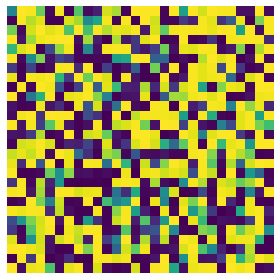

In [ ]:
import cv2
def training(epochs=50, batch_size=1):
    
    #Loading the data
    # (X_train, y_train, X_test, y_test) = load_data()
    # batch_count = X_train.shape[0] / batch_size
    
    # Creating GAN
    generator= build_generator()
    discriminator= build_discriminator()
    gan = create_gan(discriminator, generator)
     
    for e in range(1,epochs+1 ):
        print("Epoch %d" %e)
        for _ in tqdm(range(batch_size)):
        #generate  random noise as an input  to  initialize the  generator
            noise= np.random.normal(0,1, [batch_size, 100])
            print(noise.shape)
            # Generate fake MNIST images from noised input
            generated_images = generator.predict(noise)
            generated_images=generated_images.reshape(1,28*28)
            print("GENERATE",generated_images.shape)
            # Get a random set of  real images

            #image_batch =X_train[np.random.randint(low=0,high=X_train.shape[0],size=batch_size)]
            image_batch=cv2.imread("/content/download (1).jpg",0)
            image_batch=cv2.resize(image_batch,(28,28))
            image_batch=image_batch.reshape(1,28*28)
            print("REAL",image_batch.shape)
            #Construct different batches of  real and fake data 
            X= np.concatenate([image_batch, generated_images])
            print(X.shape)
            # Labels for generated and real data
            y_dis=np.zeros(2*batch_size)
            y_dis[:batch_size]=0.9
            print(y_dis.shape)
            #Pre train discriminator on  fake and real data  before starting the gan. 
            discriminator.trainable=True
            discriminator.train_on_batch(X, y_dis)
            
            #Tricking the noised input of the Generator as real data
            noise= np.random.normal(0,1, [batch_size, 100])
            y_gen = np.ones(batch_size)
            
            # During the training of gan, 
            # the weights of discriminator should be fixed. 
            #We can enforce that by setting the trainable flag
            discriminator.trainable=False
            
            #training  the GAN by alternating the training of the Discriminator 
            #and training the chained GAN model with Discriminator’s weights freezed.
            gan.train_on_batch(noise, y_gen)
            
        if e == 1 or e % 20 == 0:
            plot_generated_images(e, generator)
training(50,1)

TypeError: ignored

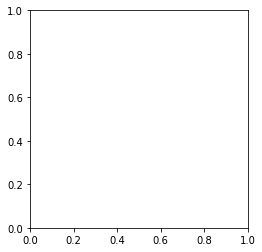

In [ ]:
plt.imshow("/content/gan_generated_image 1.png")